In [1]:
# import necessary libraries like pandas and numpy to handle the dataset

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('loan_prediction.csv')

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# checking the null values

In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# some null values are shown in dataset

In [9]:
# i will encode necessary columns and fill null values wherever required together

In [10]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

lab_enc = LabelEncoder()
ord_enc = OrdinalEncoder()

In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [13]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [14]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [15]:
df['Gender'].isna().sum()

0

In [16]:
df['Gender'] = lab_enc.fit_transform(df['Gender'])

In [17]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [18]:
df['Married'].isna().sum()

3

In [19]:
df['Married'].mode()

0    Yes
Name: Married, dtype: object

In [20]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [21]:
df['Married'] = lab_enc.fit_transform(df['Married'])

In [22]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [23]:
df['Dependents'].isna().sum()

15

In [24]:
df['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [25]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [26]:
df['Dependents'].isna().sum()

0

In [27]:
df['Dependents'] = lab_enc.fit_transform(df['Dependents'])

In [28]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [29]:
df['Education'].isna().sum()

0

In [30]:
ord_enc = OrdinalEncoder(categories=[['Not Graduate','Graduate']])

df['Education'] = ord_enc.fit_transform(df[['Education']])

In [31]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [32]:
df['Self_Employed'].isna().sum()

32

In [33]:
df['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [34]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [35]:
df['Self_Employed'].isna().sum()

0

In [36]:
df['Self_Employed'] = lab_enc.fit_transform(df['Self_Employed'])

In [37]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [38]:
df['ApplicantIncome'].isna().sum()

0

In [39]:
df['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [40]:
df['CoapplicantIncome'].isna().sum()

0

In [41]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [42]:
df['LoanAmount'].isna().sum()

22

In [43]:
df['LoanAmount'].mode()

0    120.0
Name: LoanAmount, dtype: float64

In [44]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])

In [45]:
df['LoanAmount'].isna().sum()

0

In [46]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [47]:
df['Loan_Amount_Term'].isna().sum()

14

In [48]:
df['Loan_Amount_Term'].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [49]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [50]:
df['Loan_Amount_Term'].isna().sum()

0

In [51]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [52]:
df['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [53]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [54]:
df['Credit_History'].isna().sum()

0

In [55]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [56]:
df['Property_Area'].isna().sum()

0

In [57]:
ord_enc = OrdinalEncoder(categories=[['Rural','Semiurban','Urban']])

df['Property_Area'] = ord_enc.fit_transform(df[['Property_Area']])

In [58]:
df['Loan_Status'] = lab_enc.fit_transform(df['Loan_Status'])

In [59]:
# after encoding let's have a look on dataset how it is

In [60]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1.0,0,5849,0.0,120.0,360.0,1.0,2.0,1
1,LP001003,1,1,1,1.0,0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,LP001005,1,1,0,1.0,1,3000,0.0,66.0,360.0,1.0,2.0,1
3,LP001006,1,1,0,0.0,0,2583,2358.0,120.0,360.0,1.0,2.0,1
4,LP001008,1,0,0,1.0,0,6000,0.0,141.0,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1.0,0,2900,0.0,71.0,360.0,1.0,0.0,1
610,LP002979,1,1,3,1.0,0,4106,0.0,40.0,180.0,1.0,0.0,1
611,LP002983,1,1,1,1.0,0,8072,240.0,253.0,360.0,1.0,2.0,1
612,LP002984,1,1,2,1.0,0,7583,0.0,187.0,360.0,1.0,2.0,1


In [61]:
#  there is a column named 'Loan_ID' seems like a nominal column so let's delete it

In [62]:
df = df.drop(columns=['Loan_ID'])

In [63]:
# assign dataset in two variables for plotting

In [64]:
X = df.drop(columns=['Loan_Status'])
Y = df['Loan_Status']

In [65]:
# applying visualization techniques

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

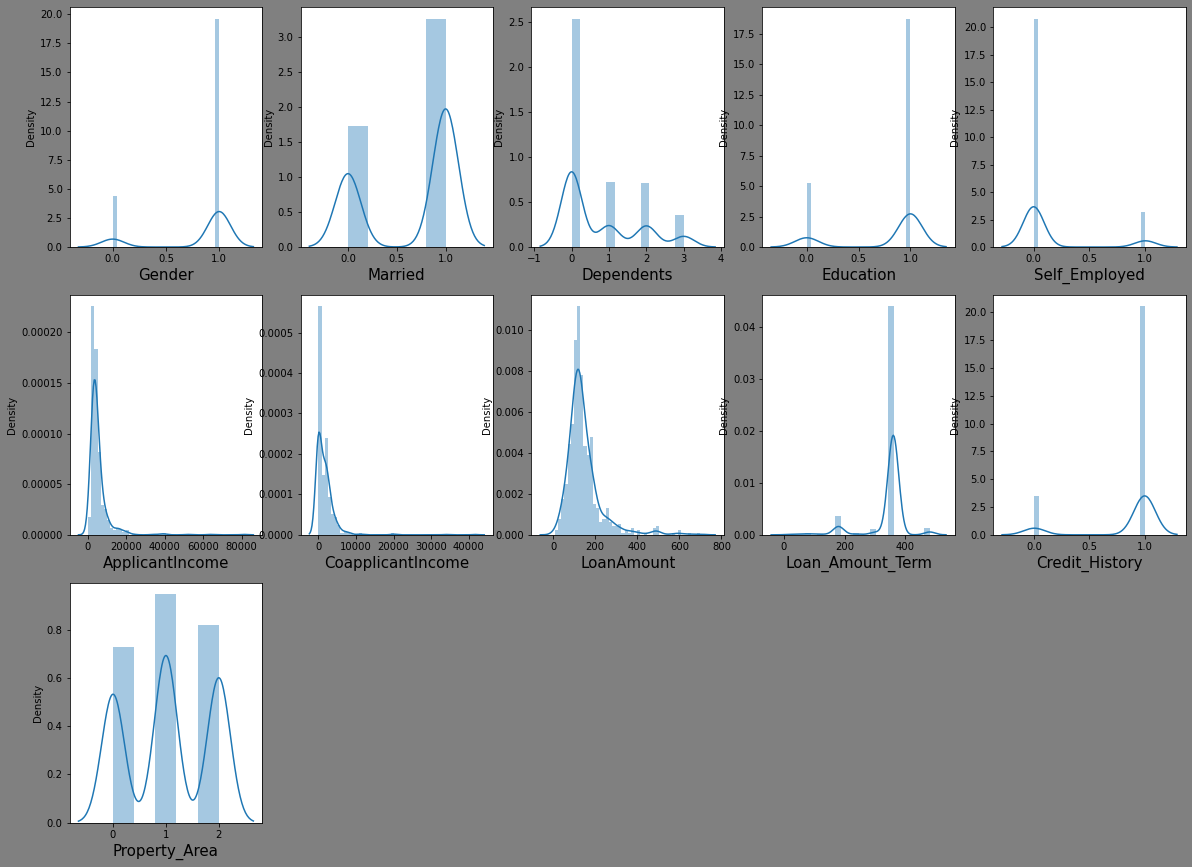

In [67]:
plt.figure(figsize=(20,15),facecolor='grey')
plotnumber=1

for column in X:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
    
plt.show()

In [68]:
# data seems like having some outliers because it is not forming bell-shape curve

In [69]:
# check it by plotting boxplot

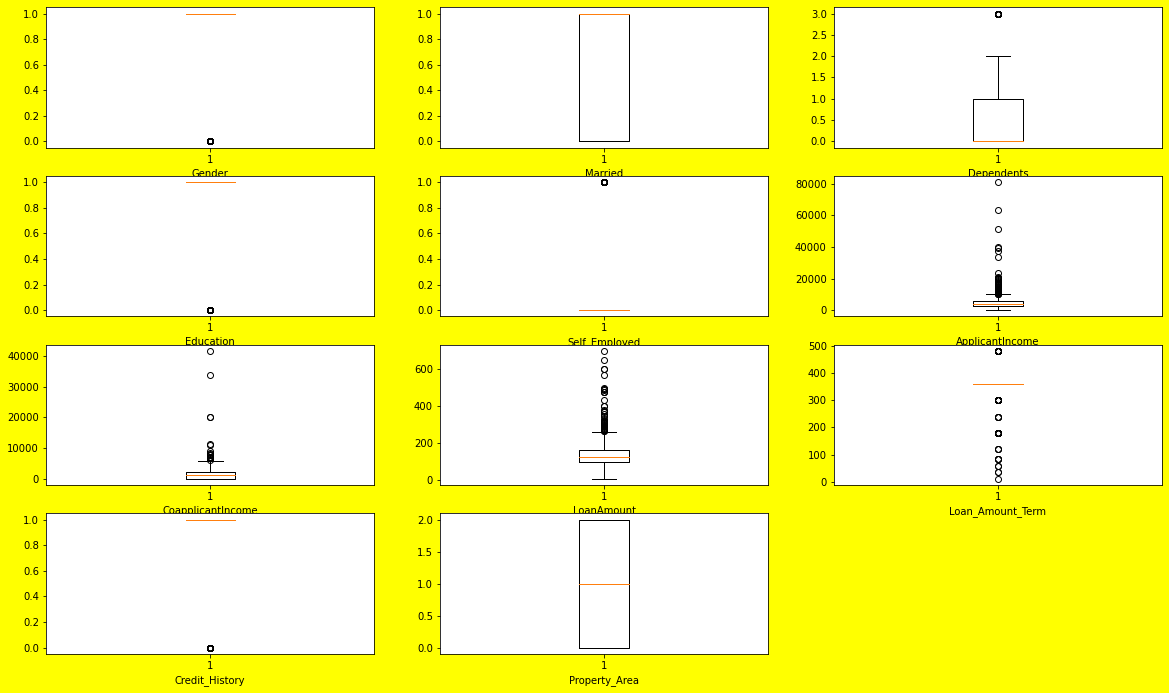

In [70]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1

for column in X:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.boxplot(X[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
    
plt.show()

In [71]:
# now let's start deal with outliers

In [72]:
q1 = df.quantile(0.25)

In [73]:
q3 = df.quantile(0.75)

In [74]:
iqr = q3 - q1

In [75]:
print(q1)

Gender                  1.00
Married                 0.00
Dependents              0.00
Education               1.00
Self_Employed           0.00
ApplicantIncome      2877.50
CoapplicantIncome       0.00
LoanAmount            100.25
Loan_Amount_Term      360.00
Credit_History          1.00
Property_Area           0.00
Loan_Status             0.00
Name: 0.25, dtype: float64


In [76]:
print(q3)

Gender                  1.00
Married                 1.00
Dependents              1.00
Education               1.00
Self_Employed           0.00
ApplicantIncome      5795.00
CoapplicantIncome    2297.25
LoanAmount            164.75
Loan_Amount_Term      360.00
Credit_History          1.00
Property_Area           2.00
Loan_Status             1.00
Name: 0.75, dtype: float64


In [77]:
print(iqr)

Gender                  0.00
Married                 1.00
Dependents              1.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
Credit_History          0.00
Property_Area           2.00
Loan_Status             1.00
dtype: float64


In [78]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [79]:
gen_high = (q3.Gender + (1.5 * iqr.Gender))
gen_high

1.0

In [80]:
index = np.where(df['Gender'] > gen_high)
index

(array([], dtype=int64),)

In [81]:
gen_low = (q1.Gender - (1.5 * iqr.Gender))
gen_low

1.0

In [82]:
index = np.where(df['Gender'] < gen_low)
index

(array([ 17,  29,  37,  45,  48,  49,  50,  51,  52,  54,  64,  69,  80,
         82,  96, 111, 113, 116, 119, 121, 122, 125, 136, 145, 146, 148,
        166, 184, 197, 198, 205, 206, 210, 219, 233, 237, 238, 251, 255,
        262, 263, 268, 269, 270, 279, 283, 286, 288, 293, 297, 298, 302,
        306, 307, 310, 312, 318, 323, 328, 329, 338, 339, 341, 353, 354,
        355, 360, 370, 374, 382, 396, 399, 403, 404, 405, 407, 410, 414,
        415, 416, 421, 426, 430, 435, 439, 463, 468, 473, 480, 493, 495,
        500, 501, 509, 516, 519, 534, 540, 541, 542, 544, 548, 556, 559,
        561, 568, 582, 587, 600, 604, 609, 613], dtype=int64),)

In [83]:
df = df.drop(df.index[index])

In [84]:
df.shape

(502, 12)

In [85]:
ma_high = (q3.Married + (1.5 * iqr.Married))
ma_high

2.5

In [86]:
index = np.where(df['Married'] > ma_high)
index

(array([], dtype=int64),)

In [87]:
ma_low = (q1.Married - (1.5 * iqr.Married))
ma_low

-1.5

In [88]:
index = np.where(df['Married'] < ma_low)
index

(array([], dtype=int64),)

In [89]:
dep_high = (q3.Dependents + (1.5 * iqr.Dependents))
dep_high

2.5

In [90]:
index = np.where(df['Dependents'] > dep_high)
index

(array([  7,  32,  51,  57,  61,  62,  66,  67,  94, 104, 113, 129, 144,
        145, 150, 172, 178, 180, 182, 218, 220, 226, 246, 264, 266, 278,
        280, 289, 293, 307, 320, 321, 333, 357, 376, 380, 385, 392, 421,
        426, 435, 442, 454, 462, 468, 484, 493, 499], dtype=int64),)

In [91]:
df = df.drop(df.index[index])

In [92]:
df.shape

(454, 12)

In [93]:
dep_low = (q1.Dependents - (1.5 * iqr.Dependents))
dep_low

-1.5

In [94]:
index = np.where(df['Dependents'] < dep_low)
index

(array([], dtype=int64),)

In [95]:
ed_high = (q3.Education + (1.5 * iqr.Education))
ed_high

1.0

In [96]:
index = np.where(df['Education'] > ed_high)
index

(array([], dtype=int64),)

In [97]:
ed_low = (q1.Education - (1.5 * iqr.Education))
ed_low

1.0

In [98]:
index = np.where(df['Education'] < ed_low)
index

(array([  3,   6,  15,  16,  18,  20,  21,  25,  26,  34,  39,  47,  49,
         52,  55,  64,  70,  72,  75,  77,  84,  87,  94, 105, 116, 122,
        131, 133, 137, 147, 149, 155, 157, 158, 159, 173, 179, 185, 188,
        191, 194, 195, 196, 198, 213, 226, 227, 230, 232, 233, 236, 241,
        253, 256, 257, 264, 269, 286, 287, 291, 295, 296, 297, 299, 302,
        303, 314, 327, 330, 331, 332, 348, 358, 363, 364, 365, 367, 372,
        373, 378, 383, 385, 391, 392, 393, 397, 400, 401, 403, 407, 409,
        413, 415, 417, 423, 441, 442, 446, 448, 450], dtype=int64),)

In [99]:
df = df.drop(df.index[index])

In [100]:
df.shape

(354, 12)

In [101]:
se_high = (q3.Self_Employed + (1.5 * iqr.Self_Employed))
se_high

0.0

In [102]:
ap_high = (q3.ApplicantIncome + (1.5 * iqr.ApplicantIncome))
ap_high

10171.25

In [103]:
index = np.where(df['ApplicantIncome'] > ap_high)
index

(array([  6,  39,  59,  63,  67,  73,  75,  81,  86, 112, 113, 118, 123,
        154, 155, 161, 168, 171, 183, 196, 216, 244, 249, 254, 257, 274,
        278, 281, 284, 287, 296, 307, 311, 328, 345], dtype=int64),)

In [104]:
df = df.drop(df.index[index])

In [105]:
df.shape

(319, 12)

In [106]:
ap_low = (q1.ApplicantIncome - (1.5 * iqr.ApplicantIncome))
ap_low

-1498.75

In [107]:
index = np.where(df['ApplicantIncome'] < ap_low)
index

(array([], dtype=int64),)

In [108]:
co_high = (q3.CoapplicantIncome + (1.5 * iqr.CoapplicantIncome))
co_high

5743.125

In [109]:
index = np.where(df['CoapplicantIncome'] > co_high)
index

(array([  8,  23, 100, 184, 197, 214, 217, 233, 270, 274, 301], dtype=int64),)

In [110]:
df = df.drop(df.index[index])

In [111]:
df.shape

(308, 12)

In [112]:
co_low = (q1.CoapplicantIncome - (1.5 * iqr.CoapplicantIncome))
co_low

-3445.875

In [113]:
index = np.where(df['CoapplicantIncome'] < co_low)
index

(array([], dtype=int64),)

In [114]:
la_high = (q3.LoanAmount + (1.5 * iqr.LoanAmount))
la_high

261.5

In [115]:
index = np.where(df['LoanAmount'] > la_high)
index

(array([  4,  12,  42,  86, 138, 168, 182, 199, 262, 269], dtype=int64),)

In [116]:
df = df.drop(df.index[index])

In [117]:
df.shape

(298, 12)

In [118]:
la_low = (q1.LoanAmount - (1.5 * iqr.LoanAmount))
la_low

3.5

In [119]:
index = np.where(df['LoanAmount'] < la_low)
index

(array([], dtype=int64),)

In [120]:
lt_high = (q3.Loan_Amount_Term +(1.5 * iqr.Loan_Amount_Term))
lt_high

360.0

In [121]:
index = np.where(df['Loan_Amount_Term'] > lt_high)
index

(array([ 36,  88, 119, 132, 182, 189], dtype=int64),)

In [122]:
df = df.drop(df.index[index])

In [123]:
df.shape

(292, 12)

In [124]:
lt_low = (q1.Loan_Amount_Term - (1.5 * iqr.Loan_Amount_Term))
lt_low

360.0

In [125]:
index = np.where(df['Loan_Amount_Term'] < lt_low)
index

(array([  8,  35,  39,  45,  65,  70,  84,  93,  94,  97, 119, 125, 127,
        141, 153, 164, 176, 181, 182, 188, 195, 216, 230, 239, 260, 269,
        277, 281, 282, 283], dtype=int64),)

In [126]:
df = df.drop(df.index[index])

In [127]:
df.shape

(262, 12)

In [128]:
prop_high = (q3.Property_Area + (1.5 * iqr.Property_Area))
prop_high

5.0

In [129]:
index = np.where(df['Property_Area'] > prop_high)
index

(array([], dtype=int64),)

In [130]:
prop_low = (q1.Property_Area - (1.5 * iqr.Property_Area))
prop_low

-3.0

In [131]:
index = np.where(df['Property_Area'] < prop_low)
index

(array([], dtype=int64),)

In [132]:
df.shape

(262, 12)

In [133]:
# after dealing with outliers again check by plotting boxplot

In [134]:
X1 = df.drop(columns=['Loan_Status'])

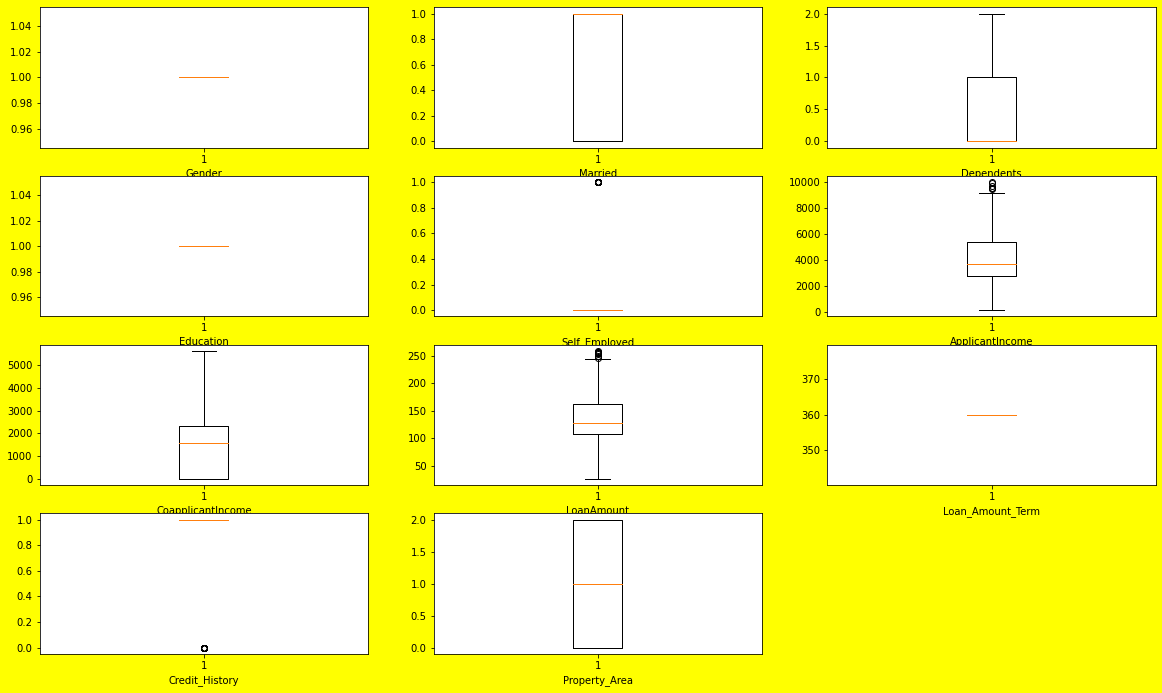

In [135]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1

for column in X1:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.boxplot(X1[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
    
plt.show()

In [136]:
# plotting distribution plot 

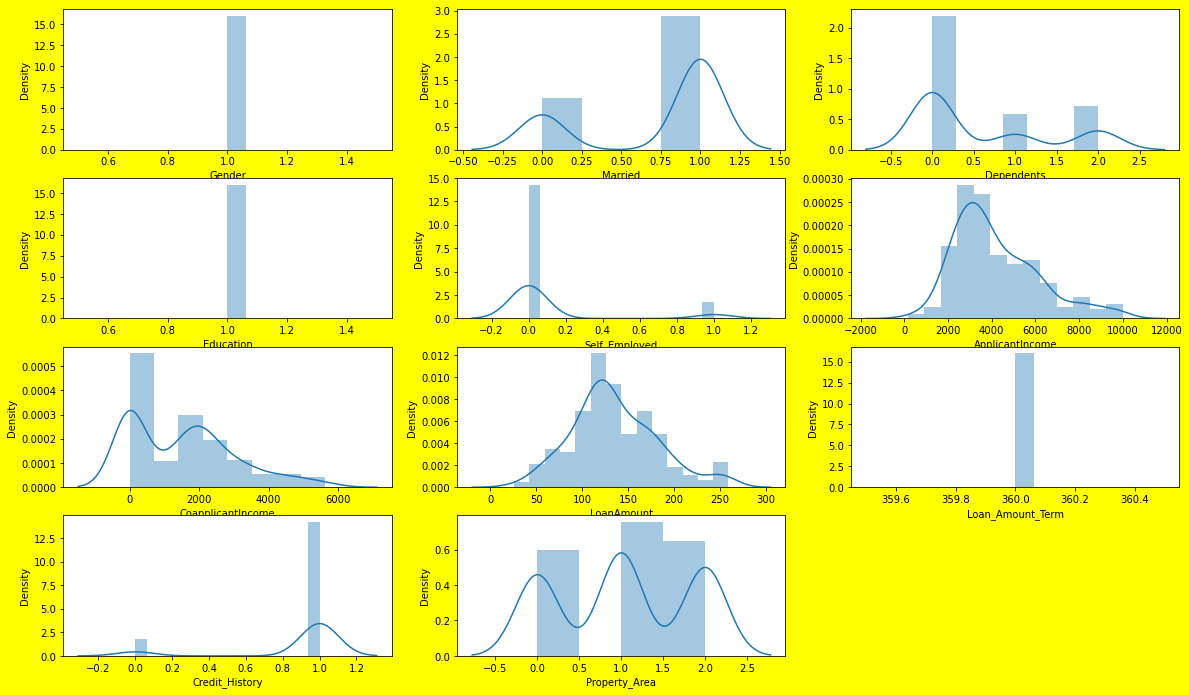

In [137]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1

for column in X1:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(X1[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
    
plt.show()

In [138]:
# now it is looking better than previous

In [139]:
# now it's time to standardize the data and train-test-split

In [140]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [141]:
x = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [142]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [143]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=100)

In [144]:
# first model Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [146]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [147]:
lr_pred = lr.predict(x_test)

In [148]:
accuracy = accuracy_score(y_test,lr_pred)

accuracy

0.8333333333333334

In [149]:
conf_mat = confusion_matrix(y_test,lr_pred)
conf_mat

array([[ 7, 11],
       [ 0, 48]], dtype=int64)

In [150]:
(7 + 48)/(7 + 11 + 0 + 48)

0.8333333333333334

In [151]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.39      0.56        18
           1       0.81      1.00      0.90        48

    accuracy                           0.83        66
   macro avg       0.91      0.69      0.73        66
weighted avg       0.86      0.83      0.81        66



In [152]:
# second model DecisionTree

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [155]:
dt_pred = dt.predict(x_test)

In [156]:
accuracy = accuracy_score(y_test,dt_pred)
accuracy

0.7575757575757576

In [157]:
conf_mat = confusion_matrix(y_test,dt_pred)
conf_mat

array([[ 9,  9],
       [ 7, 41]], dtype=int64)

In [158]:
(8 + 37)/(8 + 10 + 11 + 37)

0.6818181818181818

In [159]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        18
           1       0.82      0.85      0.84        48

    accuracy                           0.76        66
   macro avg       0.69      0.68      0.68        66
weighted avg       0.75      0.76      0.75        66



In [160]:
# third model RandomForest

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
rf = RandomForestClassifier()

rf.fit(x_train,y_train)

RandomForestClassifier()

In [163]:
rf_pred = rf.predict(x_test)

In [164]:
accuracy = accuracy_score(y_test,rf_pred)
accuracy

0.8484848484848485

In [165]:
conf_mat = confusion_matrix(y_test,rf_pred)
conf_mat

array([[ 8, 10],
       [ 0, 48]], dtype=int64)

In [166]:
(7 + 48)/(7 + 11 + 0 + 48)

0.8333333333333334

In [167]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.44      0.62        18
           1       0.83      1.00      0.91        48

    accuracy                           0.85        66
   macro avg       0.91      0.72      0.76        66
weighted avg       0.87      0.85      0.83        66



In [168]:
# fourth model SVM

In [169]:
from sklearn.svm import SVC

In [170]:
svc = SVC()

svc.fit(x_train,y_train)

SVC()

In [171]:
svc_pred = svc.predict(x_test)

In [172]:
accuracy = accuracy_score(y_test,svc_pred)
accuracy

0.8181818181818182

In [173]:
conf_mat = confusion_matrix(y_test,svc_pred)
conf_mat

array([[ 6, 12],
       [ 0, 48]], dtype=int64)

In [174]:
(6 + 48)/(6 + 12 + 0 + 48)

0.8181818181818182

In [175]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        18
           1       0.80      1.00      0.89        48

    accuracy                           0.82        66
   macro avg       0.90      0.67      0.69        66
weighted avg       0.85      0.82      0.78        66



In [176]:
# now compare all four models on train data and test data

In [177]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

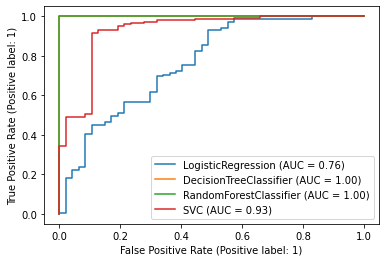

In [178]:
disp = plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(dt,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)

plt.show()

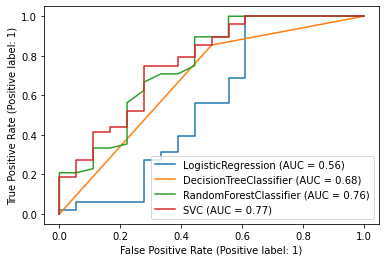

In [179]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)

plt.show()

In [180]:
import pickle

In [181]:
pickle.dump(rf,open('rf_cl_LoanPrediction','wb'))